In [125]:
#basic imports
import numpy as np
import os
import cv2
import tensorflow as tf

CATEGORIES=["0","1","2","3","4","5","6","7","8","9",
           "adna","ba","bha","cha","chha","chhya","da","daa","dha","dhaa","ga",
           "gha","gya","ha","ja","jha","ka","kha","kna","ksha","la","ma","na",
           "pa","pha","ra","sa","sh","t","ta","tha","thaa","tra","waw","yaw","yna"]

'''
# use if trained on grayscale specified: model-2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(32,32))
    image=np.array(new_array).reshape((-1, 32, 32, 1))
    
    return image 
'''
# use if trained on grayscale not specified: model-1
def prepare(filepath):
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array,(32,32))
    image=np.array(new_array).reshape((-1, 32, 32, 3))
    
    return image 




model=tf.keras.models.load_model('devnagri-script-detection-2.model')

'''
prediction=[model.predict_classes([prepare('1.jpeg')])]
prediction.append(model.predict_classes([prepare('2.jpeg')]))
prediction.append(model.predict_classes([prepare('3.jpeg')]))
prediction.append(model.predict_classes([prepare('4.jpeg')]))
prediction.append(model.predict_classes([prepare('5.jpeg')]))
prediction.append(model.predict_classes([prepare('6.jpeg')]))
prediction.append(model.predict_classes([prepare('7.jpeg')]))



for l in range(len(prediction)):
    print((l+1),"  ",CATEGORIES[int(prediction[l])], "  ", prediction[l])
    
'''

1    chhya    [15]
2    ba    [11]
3    chhya    [15]
4    ba    [11]
5    bha    [12]
6    chhya    [15]
7    ba    [11]


In [192]:
#preprocession to introduce abnormalities in the training data
#

from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math

#filepath='C:/IDK/ML/Devnagri/v2/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13801.png'
filepath='C:/IDK/ML/Devnagri/v2/2.jpeg'


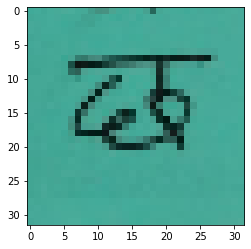

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


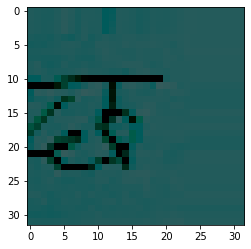

'\nimage = load_img(image_path, target_size=(299, 299))\nimage = img_to_array(image)\nimage = np.expand_dims(image, axis=0) # 1 x input_shape\nimage = preprocess_input(image)\n\ntrain_datagen.fit(image)\nimage = train_datagen.random_transform(image)\n'

In [232]:
#data augmentation

random.seed(1)
train_datagen = ImageDataGenerator(
    rotation_range=random.random()*180,
    width_shift_range=[-5*random.random(),10*random.random()],
    height_shift_range=[-10*random.random(),5*random.random()],
    #brightness_range=[random.random(),random.random()*2],
    shear_range=10*random.random(),
    #zoom_range=random.random()*10,
    horizontal_flip=True,
    vertical_flip=True,
    channel_shift_range=random.random())
    #fill_mode='nearest')


img_array=cv2.imread(filepath)
new_array=cv2.resize(img_array,(32,32))
plt.imshow(new_array)
plt.show()
image = img_to_array(new_array)
image = preprocess_input(image)
image = train_datagen.random_transform(image)
plt.imshow(image)
plt.show()
image=np.array(new_array).reshape((-1, 32, 32, 3))
np.shape(np.array(image))



# train_datagen.fit(image)

'''
image = load_img(image_path, target_size=(299, 299))
image = img_to_array(image)
image = np.expand_dims(image, axis=0) # 1 x input_shape
image = preprocess_input(image)

train_datagen.fit(image)
image = train_datagen.random_transform(image)
'''

In [239]:
print(image)

[[[[ 64 170 153]
   [ 67 171 154]
   [ 65 167 150]
   ...
   [ 72 171 153]
   [ 73 172 154]
   [ 72 170 154]]

  [[ 66 167 150]
   [ 67 169 152]
   [ 67 169 152]
   ...
   [ 72 171 153]
   [ 73 169 152]
   [ 72 170 154]]

  [[ 71 169 153]
   [ 69 168 152]
   [ 67 169 152]
   ...
   [ 72 171 153]
   [ 73 169 152]
   [ 72 170 154]]

  ...

  [[ 69 167 151]
   [ 71 169 153]
   [ 68 167 151]
   ...
   [ 70 170 152]
   [ 71 171 153]
   [ 72 171 153]]

  [[ 71 169 153]
   [ 70 168 152]
   [ 69 168 152]
   ...
   [ 72 168 151]
   [ 74 170 153]
   [ 72 170 152]]

  [[ 68 166 150]
   [ 70 168 152]
   [ 71 169 153]
   ...
   [ 75 169 152]
   [ 75 169 152]
   [ 78 171 153]]]]


In [233]:
model=tf.keras.models.load_model('devnagri-script-detection-1.model')
prediction=[model.predict_classes([image])]

In [234]:
print(prediction)

[array([27], dtype=int64)]


In [235]:
# load the directory where image(or dataset) folders are
DATADIR='C:\IDK\ML\Devnagri\DevanagariHandwrittenCharacterDataset\Train'
CATEGORIES=["0","1","2","3","4","5","6","7","8","9",
           "adna","ba","bha","cha","chha","chhya","da","daa","dha","dhaa","ga",
           "gha","gya","ha","ja","jha","ka","kha","kna","ksha","la","ma","na",
           "pa","pha","ra","sa","sh","t","ta","tha","thaa","tra","waw","yaw","yna"]

In [353]:
# creating the training data from the images dataset

random.seed(1)
train_datagen = ImageDataGenerator(
    rotation_range=random.random()*180,
    width_shift_range=[-5*random.random(),10*random.random()],
    height_shift_range=[-10*random.random(),5*random.random()],
    #brightness_range=[random.random(),random.random()*2],
    shear_range=10*random.random(),
    #zoom_range=random.random()*10,
    horizontal_flip=True,
    vertical_flip=True,
    channel_shift_range=random.random())


training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):            
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(32,32))
            image = img_to_array(new_array)
            image = preprocess_input(image)
            image = train_datagen.random_transform(image)
            image=np.array(image).reshape((-1,32, 32, 3))            
            training_data.append([image,class_num])
create_training_data()


random.shuffle(training_data)




In [357]:
np.shape(training_data[1])

(2,)

In [359]:
X=[]
y=[]

for features, labels in training_data:
    X.append(features)
    y.append(labels)



In [360]:
print(np.shape(X))
print(np.shape(y))

(78200, 1, 32, 32, 3)
(78200,)


In [349]:
X=np.array(X) # .reshape(-1,32,32,1)
X=X.reshape(-1,32,32,3)
y=np.array(y)
#y=tf.keras.utils.to_categorical(y, num_classes=46, dtype='float32')

In [351]:
np.shape(X)

(78200, 32, 32, 3)

In [361]:
model=tf.keras.models.load_model('devnagri-script-detection-1.model')
prediction=[model.predict_classes([X[9826]])]
print(prediction)

[array([0], dtype=int64)]


In [362]:
y[9826]

16

In [255]:
X[1]

array([[[[-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         ...,
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ]],

        [[-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         ...,
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ]],

        [[-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         ...,
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ],
         [-0.4550333 , -0.4550333 , -0.4550333 ]],

        ...,

        [[-0.4550333 , -0.4550333 , -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


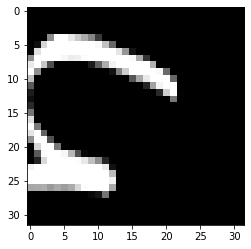

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   ...
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]]

  [[-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   ...
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]]

  [[-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   ...
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]]

  ...

  [[-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   ...
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]
   [-0.9178003 -0.9178003 -0.9178003]]

  [[-0.9178003 -0.9178003 -0.9178003]
   [-0.

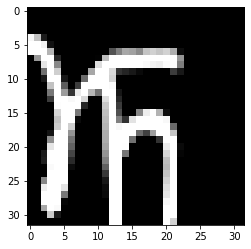

[[[[-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   ...
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]]

  [[-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   ...
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]]

  [[-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   ...
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]]

  ...

  [[-0.6278007  -0.6278007  -0.6278007 ]
   [-0.56682837 -0.56682837 -0.56682837]
   [ 0.6612935   0.6612935   0.6612935 ]
   ...
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  -0.6278007  -0.6278007 ]
   [-0.6278007  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


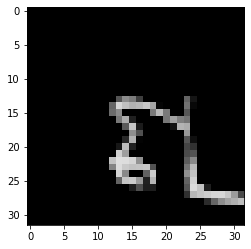

[[[[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  ...

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-0.6852283  -0.6852283  -0.6852283 ]
   [-0.43116325 -0.43116325 -0.43116325]
   [-0.10353868 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


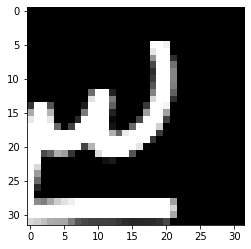

[[[[-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   ...
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]]

  [[-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   ...
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]]

  [[-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   ...
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]]

  ...

  [[ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   [ 1.          1.          1.        ]
   ...
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 -0.38111168 -0.38111168]
   [-0.38111168 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


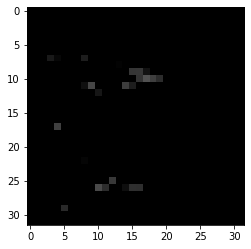

[[[[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  ...

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


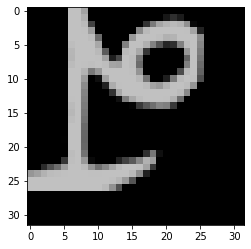

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  ...

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]

  [[-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]
   ...
   [-1. -1. -1.]
   [-1. -1. -1.]
   [-1. -1. -1.]]]]


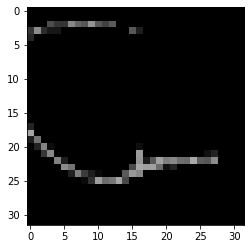

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   ...
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]]

  [[-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   ...
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]]

  [[-1.        -1.        -1.       ]
   [-0.9795817 -0.9795817 -0.9795817]
   [-0.2912141 -0.2912141 -0.2912141]
   ...
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]]

  ...

  [[-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   ...
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]
   [-1.        -1.        -1.       ]]

  [[-1.        -1.        -1.       ]
   [-1.

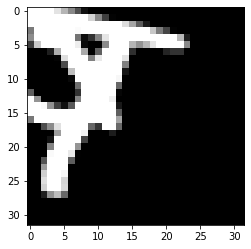

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   ...
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]]

  [[ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   ...
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]]

  [[ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   [ 1.         1.         1.       ]
   ...
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]]

  ...

  [[-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   ...
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]
   [-0.4162116 -0.4162116 -0.4162116]]

  [[-0.4162116 -0.4162116 -0.4162116]
   [-0.

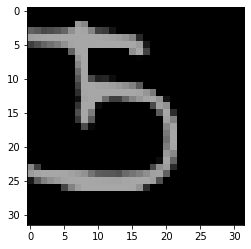

[[[[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-0.99610686 -0.99610686 -0.99610686]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  ...

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


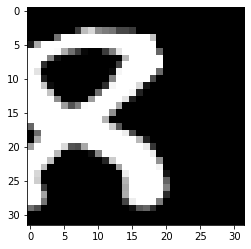

[[[[-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   ...
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]]

  [[-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   ...
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]]

  [[-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   ...
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]]

  ...

  [[ 0.43778676  0.43778676  0.43778676]
   [ 0.30433065  0.30433065  0.30433065]
   [-0.1391981  -0.1391981  -0.1391981 ]
   ...
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 -0.57961977 -0.57961977]
   [-0.57961977 

In [221]:
model=tf.keras.models.load_model('devnagri-script-detection-1.model')
for i in range(10):
    a=X[i].reshape((-1, 32, 32, 3))
    prediction=[model.predict_classes([a])]
    plt.imshow(X[i])
    plt.show()
    print(a)

In [227]:
b=np.vectorize(X[1])

In [228]:
b

In [230]:
CATEGORIES(int(b))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'vectorize'